In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [10]:
fp = 'data/goa_human.gaf'

In [11]:
header = ['DB',
          'DB_Object_ID',
          'DB_Object_Symbol',
          'Qualifier',
          'GO_ID',
          'DB_Reference',
          'Evidence_Code',
          'With_or_From',
          'Aspect',
          'DB_Object_Name',
          'DB_Object_Synonym',
          'DB_Object_Type',
          'Taxon',
          'Date',
          'Assigned_By',
          'Annotation_Extension',
          'Gene_Product_Form_ID']

In [15]:
t = pd.read_csv(fp, header=None, sep='\t', comment='!')

In [16]:
t.columns = header

In [18]:
100 * t.isnull().sum() / len(t)

DB                        0.000000
DB_Object_ID              0.000000
DB_Object_Symbol          0.000000
Qualifier                99.161823
GO_ID                     0.000000
DB_Reference              0.000000
Evidence_Code             0.000000
With_or_From             45.393561
Aspect                    0.000000
DB_Object_Name            0.000000
DB_Object_Synonym         0.047036
DB_Object_Type            0.000000
Taxon                     0.000000
Date                      0.000000
Assigned_By               0.000000
Annotation_Extension     94.763213
Gene_Product_Form_ID    100.000000
dtype: float64

Text(0.5, 1.0, '4 of the top 5 sources of annotations are experimental')

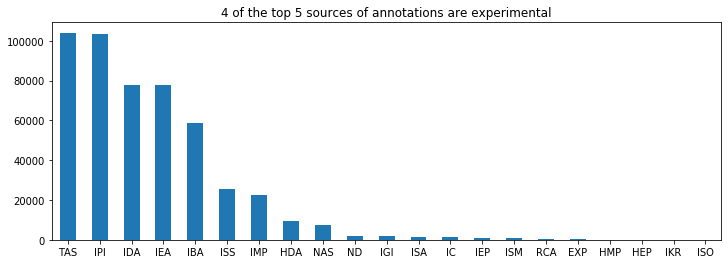

In [19]:
ax = t.Evidence_Code.value_counts().plot.bar(y='Evidence_Code', x='index', figsize=(12,4))
ax.set_xticklabels(t.Evidence_Code.value_counts().index, rotation=0);

ax.set_title('4 of the top 5 sources of annotations are experimental')

# TAS - Traceable Author Statement
# IPI - Inferred from Physical Interaction
# IDA - Inferred from Direct Assay
# IEA - Inferred from Electronic Annotation
# IBA - Inferred from Biological aspect of Ancestor
#
# http://geneontology.org/docs/guide-go-evidence-codes/



In [20]:
protein_num_anno = t.DB_Object_Symbol.value_counts()
protein_num_anno.head(10)

TP53      909
GRB2      693
EGFR      692
UBC       613
CTNNB1    606
RPS27A    559
UBB       549
UBA52     544
LRRK2     504
SRC       470
Name: DB_Object_Symbol, dtype: int64

In [60]:
12/19

0.631578947368421

Text(0, 0.5, 'Number proteins')

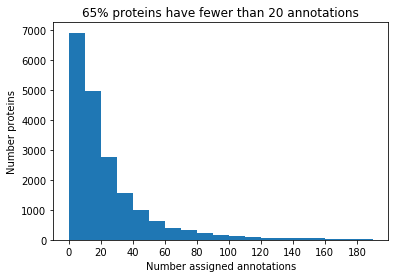

In [24]:
plt.hist(protein_num_anno, list(range(0,200,10)))
plt.xticks(list(range(0,200,20)))
plt.title('63% proteins have fewer than 20 annotations')
plt.xlabel('Number assigned annotations')
plt.ylabel('Number proteins')
#plt.bar(list(range(0,binned.count(),1)), binned)

In [27]:
binned = pd.cut(protein_num_anno,
                list(range(0,100,10)),
                right=False).value_counts()
100 * binned/sum(binned)

[0, 10)     36.826682
[10, 20)    26.463850
[20, 30)    14.801002
[30, 40)     8.354201
[40, 50)     5.274655
[50, 60)     3.361927
[60, 70)     2.088550
[70, 80)     1.662316
[80, 90)     1.166818
Name: DB_Object_Symbol, dtype: float64